# Recent rainfall data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

We get the recent rainfall data from the UK defra website, see https://environment.data.gov.uk/flood-monitoring/doc/rainfall. We first load and parse the JSON data into a pandas DataFrame.

In [2]:
def load_data(url):
    response = json.loads(requests.get(url).text)
    data = pd.DataFrame(response['items'])
    datetimes = data['dateTime']
    data.drop(columns = ['@id','measure','dateTime'], inplace=True)
    data.set_index(pd.to_datetime(datetimes), inplace=True)
    return data

def build_url(station_ID, N_days=29):
    if N_days>29:
        N_days = 29
        
    data_url = "https://environment.data.gov.uk/flood-monitoring/id/stations/"
    
    today = pd.Timestamp.today()
    start = (today - pd.Timedelta(days=N_days)).strftime('%Y-%m-%d')
    today  = today.strftime('%Y-%m-%d')
    
    url_param = "/readings.json?startdate=" + start + "&enddate=" + today + "&_sorted&parameter=rainfall&_limit=10000"
    url = data_url + station_ID + url_param
    return url

In [3]:
N_days = 29
station_ID = "245176TP"
station_ID2 = "246424TP"

data = load_data(build_url(station_ID2,N_days))
data.tail()

,value
dateTime,
2022-06-16 01:00:00+00:00,0.0
2022-06-16 00:45:00+00:00,0.0
2022-06-16 00:30:00+00:00,0.0
2022-06-16 00:15:00+00:00,0.0
2022-06-16 00:00:00+00:00,0.0


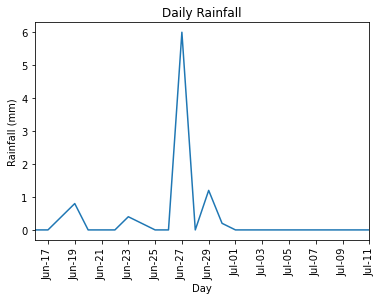

In [10]:
data_daily = data.resample('1D').sum()
_ = rainfall_plot(data_daily)

In [8]:
from matplotlib.dates import DayLocator, DateFormatter

def rainfall_plot(data):
    fig, ax = plt.subplots()
    data_daily.plot(ax=ax, legend=None)
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax.xaxis.set_major_locator(DayLocator(interval=2))
    ax.xaxis.set_major_formatter(DateFormatter("%b-%d"))
    ax.tick_params(axis="x", labelrotation= 90, bottom=True,labelbottom=True)

    ax.set_title('Daily Rainfall')
    ax.set_ylabel('Rainfall (mm)')
    ax.set_xlabel('Day')
    return ax